### classifier: K Nearest Neighbors

In [50]:
import numpy as np
import matplotlib.pyplot as plt


### Load Dataset

In [51]:
from sklearn.datasets import load_iris
iris=load_iris()

### description of data

In [52]:
print("type of dataset:", type(iris))
print("shape of samples:",iris.data.shape)
print("type of samples:", type(iris.data))
print("type of label:", type(iris.target))
print("shape of label:", iris.target.shape,"\n___________________")
print("Description of dataset:","\n", iris.DESCR)

type of dataset: <class 'sklearn.utils._bunch.Bunch'>
shape of samples: (150, 4)
type of samples: <class 'numpy.ndarray'>
type of label: <class 'numpy.ndarray'>
shape of label: (150,) 
___________________
Description of dataset: 
 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826


### Split Data to Train and Test data

In [53]:
X=iris.data
y=iris.target
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=10,stratify=y)

In [54]:
print(X_train.shape)
print(X_test.shape)
print(np.unique(y_train,return_counts=True))

(75, 4)
(75, 4)
(array([0, 1, 2]), array([25, 25, 25], dtype=int64))


### select estimator

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()

### Training

In [56]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

### Evaluation

In [57]:
y_predic= knc.predict(X_test)
from sklearn.metrics import accuracy_score
print("accuracy is:", accuracy_score(y_test,y_predic))

accuracy is: 0.9733333333333334


### Analyzing the results

In [64]:
correct_predic= np.where(y_test==y_predic)[0]
incorrect_predic=np.where(y_test!=y_predic)[0]
print("index of correct sample:",correct_predic)
print("index of incorrect sample:",incorrect_predic)
print("incorrect label:",y_predic[incorrect_predic])

index of correct sample: [ 0  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74]
index of incorrect sample: [1 2]
incorrect label: [2 1]


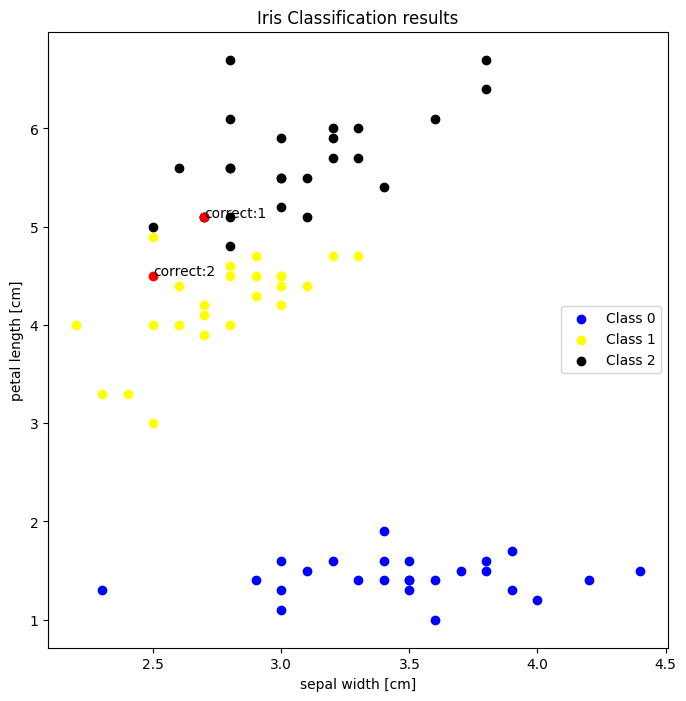

In [70]:
colors=['blue','yellow','black']
plt.figure(figsize=(8,8))
for i, color in enumerate(colors):
    idx=np.where(y_predic==i)[0]
    plt.scatter(X_test[idx,1],X_test[idx,2],color=color,label="Class %s" % str(i))

plt.scatter(X_test[incorrect_predic,1],X_test[incorrect_predic,2],color='red',)

# This line determines the correct label near to incorrect predicted point in the figure
for in_index,in_label in incorrect_predic,y_predic[incorrect_predic]:
    plt.annotate("correct:"+str(in_label*2%3),(X_test[in_index,1],X_test[in_index,2]))
plt.xlabel('sepal width [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc=5)
plt.title("Iris Classification results")
plt.show()
    

We can see that the errors occur in the area where yellow (class 1) and black (class 2) overlap. This gives us insight into what features to add - any feature that helps separate class 1 and class 2 should improve classifier performance.

1: Predicted 2 | True label 1
2: Predicted 1 | True label 2


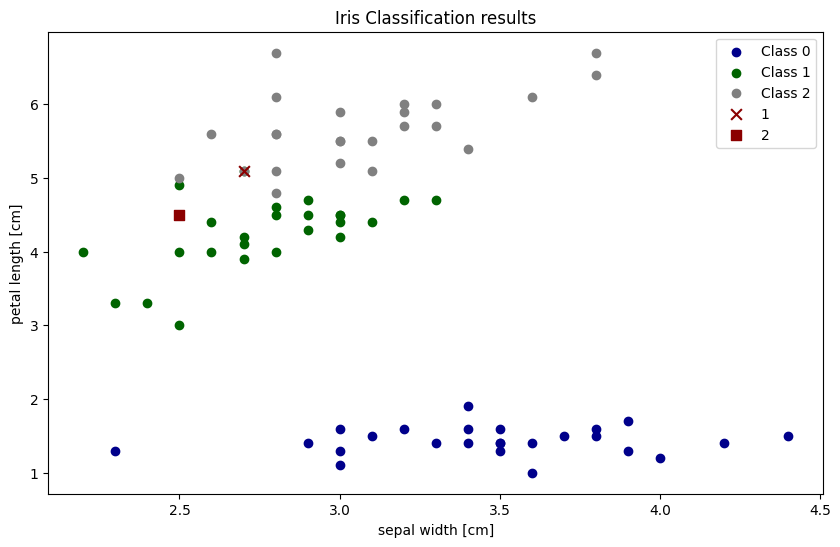

In [93]:
# %load solutions/predictions.py
plt.figure(figsize=(10, 6))


for i in incorrect_predic:
    print('%d: Predicted %d | True label %d' % (i, y_predic[i], y_test[i]))

# Plot two dimensions

colors = ["darkblue", "darkgreen", "gray"]

for n, color in enumerate(colors):
    idx = np.where(y_test == n)[0]
    plt.scatter(X_test[idx, 1], X_test[idx, 2], color=color, label="Class %s" % str(n))

for i, marker in zip(incorrect_predic, ['x', 's', 'v']):
    plt.scatter(X_test[i, 1], X_test[i, 2],
                color="darkred",
                marker=marker,
                s=60,
                label=i)

plt.xlabel('sepal width [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc=1, scatterpoints=1)
plt.title("Iris Classification results")
plt.show()
